# Neural Networks with Keras

In [1]:
from __future__ import print_function
import random
import numpy as np
import pandas as pd
from math import sin

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD   # Stochastic Gradient Descent

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score as cv

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 8)

Using TensorFlow backend.


## Neural Network Regression

### Polynomial Regression

Let's train a neural network on a few different shapes. First we start with a polynomial (a cubic).

In [2]:
# Create some data

def f(x):
    return x ** 3 - 5 * x + 12 + random.random()

X = np.linspace(-1, 1, 1000).reshape(-1, 1)
y = np.array(list(map(f, X)))

print(X.shape, y.shape)

(1000, 1) (1000, 1)


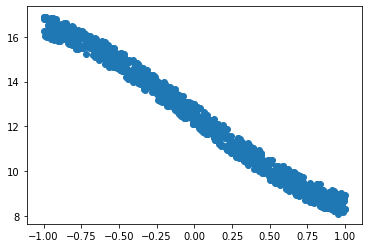

In [3]:
plt.scatter(X, y)

In [4]:
# Define a Feed Forward NN
model = Sequential()
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='linear'))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.01))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# Train the model
print('Training...')
loss = model.fit(X, y, epochs=150, validation_split=0.1, 
                 batch_size=128, verbose=False)
print(loss.history['loss'][-1])
print("Done")

Training...
Instructions for updating:
Use tf.cast instead.
0.07906413866413964
Done


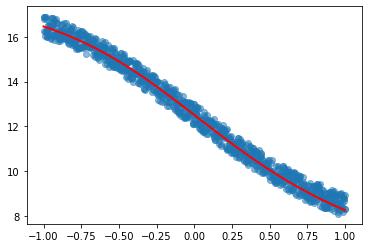

MSE 0.08368001520489092


In [6]:
# Plot the predictions
predictions = model.predict(X)

plt.scatter(X, y, alpha=0.5)
plt.plot(X, predictions, color='r', linewidth=2)
plt.show()
print("MSE", mean_squared_error(predictions, y))

### Sine Regression

In [7]:
# Sine data
X = np.linspace(0, 2 * np.pi, 500).reshape(-1,1)
y = np.sin(X)

print(X.shape, y.shape)

(500, 1) (500, 1)


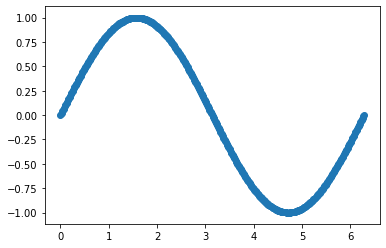

In [8]:
plt.scatter(X, y)

In [9]:
#Create the model
model = Sequential()
model.add(Dense(5, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='linear', input_shape=(5,)))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.01))

### Train the Model

In [10]:
print('Training..')
loss = model.fit(X, y, epochs=150, validation_split=0.1, 
                 batch_size=128, verbose=False)
print(loss.history['loss'][-1])
print('Complete')

Training..
0.09357116533650292
Complete


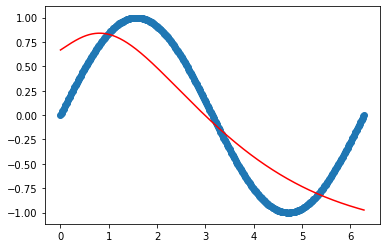

MSE 0.1273474944844176


In [11]:
# Plot the predictions
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='r')
plt.show()
print("MSE", mean_squared_error(predictions, y))

Text(0.5, 1.0, 'MSE by Epoch')

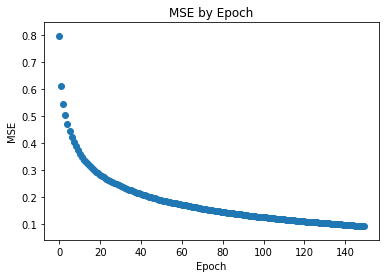

In [12]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])

# plt.scatter(range(len(loss.history['val_loss'])), loss.history['val_loss'], color='red')

plt.xlabel('Epoch')
plt.ylabel('MSE')

plt.title('MSE by Epoch')

### Train longer

If we train for more epochs, we can get a better regression.

(1000, 1) (1000, 1)
Training..
0.01653799811999003
Complete


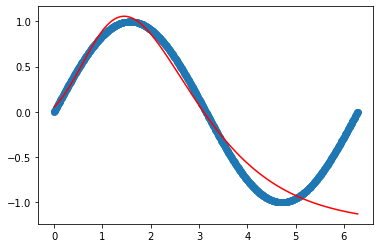

MSE 0.08164264569803156


In [13]:
X = np.linspace(0, 2 * np.pi, 1000).reshape(-1,1)
y = np.sin(X)

print(X.shape, y.shape)

model = Sequential()
model.add(Dense(5, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='linear', input_shape=(5,)))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.05))

print('Training..')
loss = model.fit(X, y, epochs=250, validation_split=0.1, 
                 batch_size=256, verbose=False)
print(loss.history['loss'][-1])
print('Complete')

# Plot
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='r')
plt.show()
print("MSE", mean_squared_error(predictions, y))

We can take a closer look at the error per training epoch.

Text(0.5, 1.0, 'MSE by Epoch')

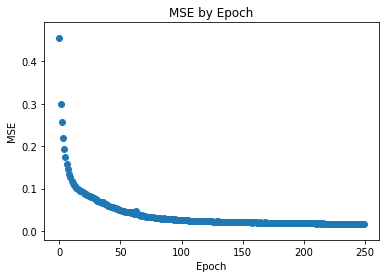

In [14]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')

### Exercise: Perform regression on the following data
Hints:
* Try adding a hidden layer
* Try lowering the learning rate and using more epochs

In [15]:
def f(x):
    return x ** 2 * np.sin(x**2)

# Sine data
X = np.linspace(2, np.pi, 1000).reshape(-1,1)
y = np.array(list(map(f, X)))

print(X.shape, y.shape)

(1000, 1) (1000, 1)


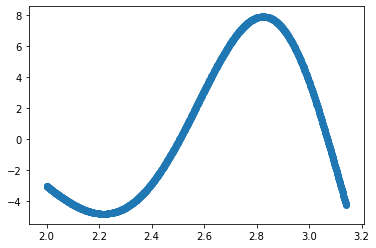

In [16]:
plt.scatter(X, y)

In [ ]:
# Solution


In [ ]:
# Setup your model




# Compile the model using MSE as your loss function and an SGD learning rate of your choice



#Fit your model



# Make your predictions


# Plot predictions


## Classification

We'll start with the Iris dataset (of course).

In [17]:
import sklearn.datasets as datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

# Break each output into indicator cols
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

(150, 4) (150, 3)


In [18]:
# Define a model
model = Sequential()

# First layer - input diminsions=k features.
model.add(Dense(4, activation='tanh', input_shape=(4,)))

# Output layer - output_dim=# of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(3, activation='softmax', input_shape=(4,)))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer=SGD(lr=0.1))

In [19]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.1, epochs=100, 
                 batch_size=16, verbose=False)

print(loss.history['loss'][-1])   # displays MSE at last iteration
print("Training complete")

Training...
0.028263651745186913
Training complete


In [20]:
# Model evaluation
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

ACCURACY:  0.9533333333333334
CONFUSION MATRIX:
 [[50  0  0]
 [ 0 48  2]
 [ 0  5 45]]


Text(0.5, 1.0, 'MSE by Epoch')

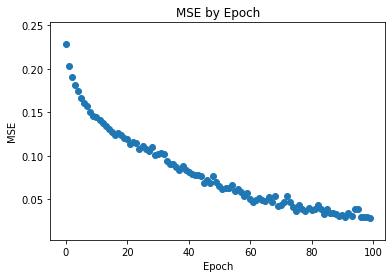

In [21]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')

## Abalone data set

In [22]:
columns = ["Sex", "Length", "Diameter", "Height", "Whole Weight",
           "Shucked weight", "Viscera weight", "Shell weight", "Rings" ]
df = pd.read_csv("./data/abalone.data", names=columns)

df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
df.describe()

,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


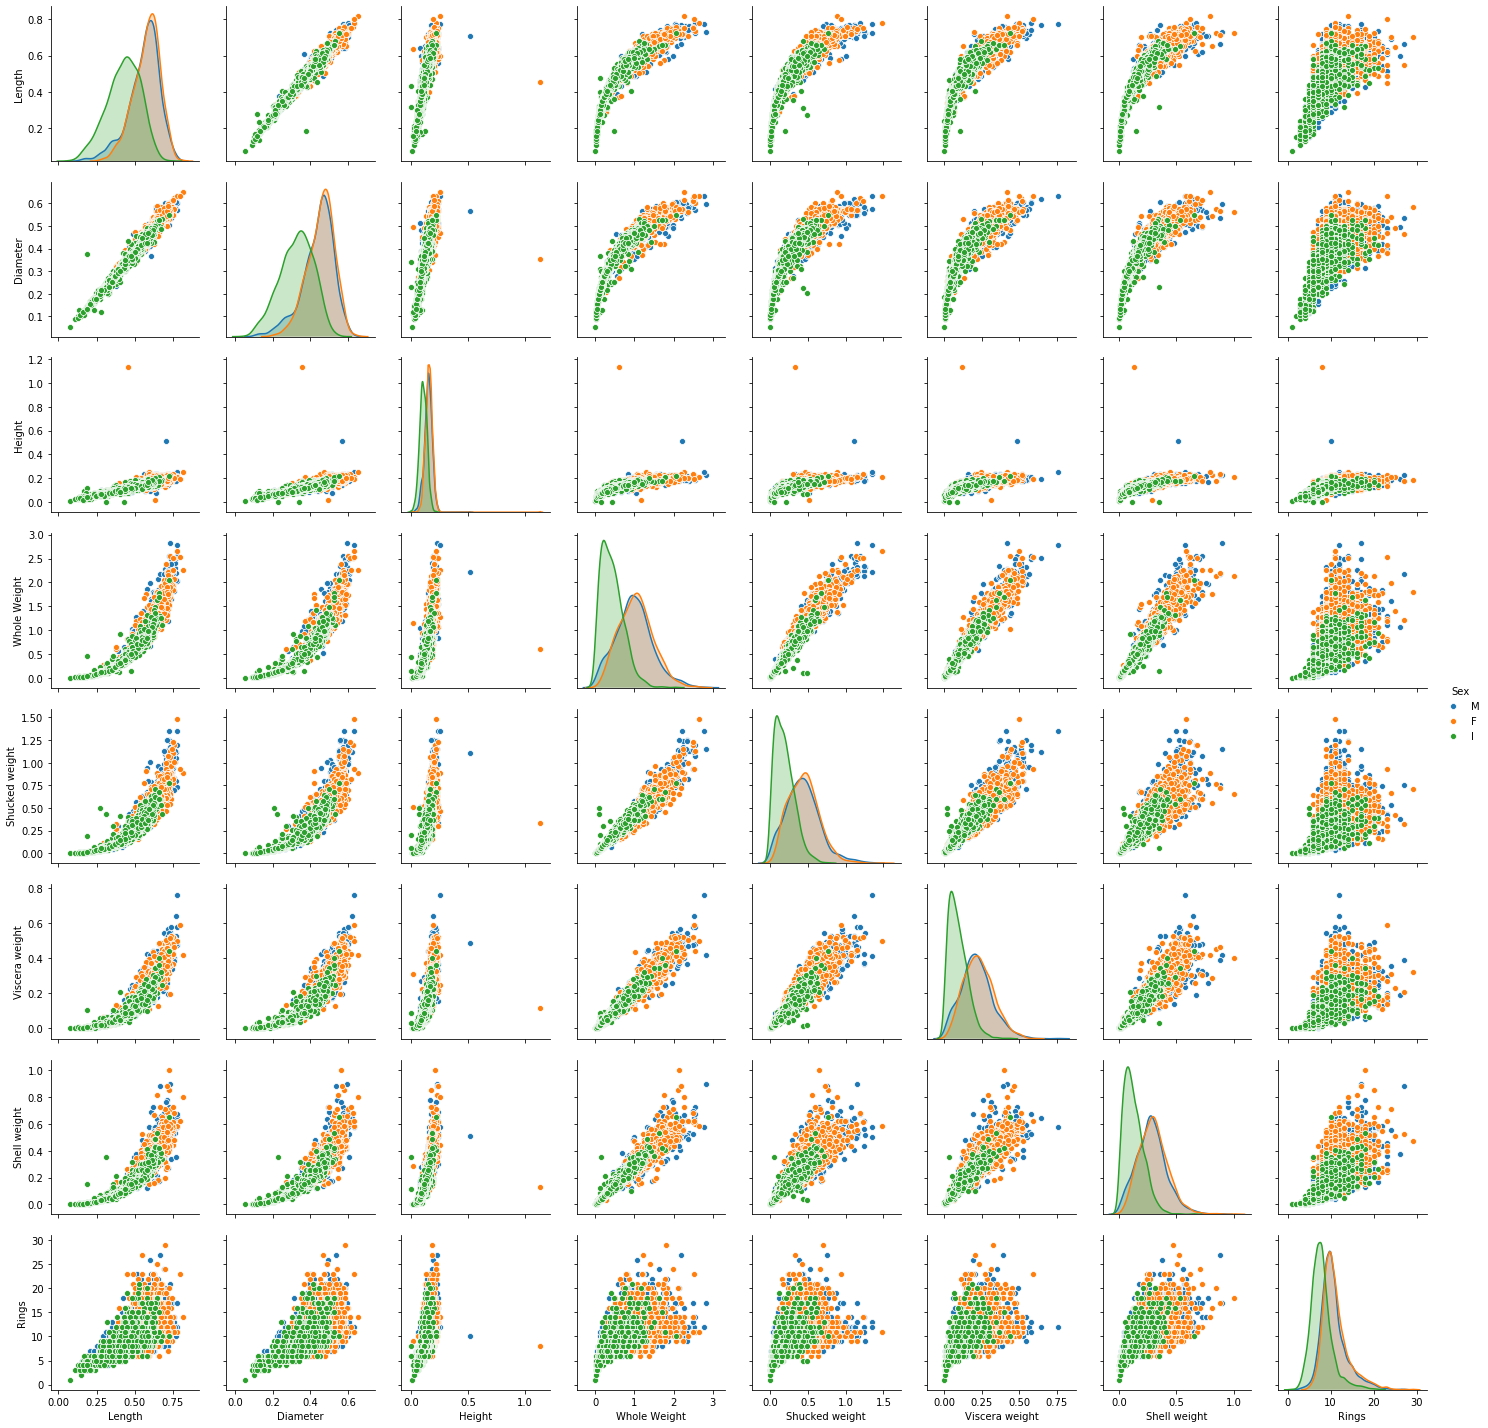

In [24]:
import seaborn as sns
sns.pairplot(data=df, vars=columns[1:], hue="Sex")
plt.show()

In [25]:
d = {'M': 0, 'F': 1, 'I': 2}
df["Sex"] = df["Sex"].apply(lambda x: d[x])

In [26]:
df.describe()

,Sex,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [27]:
X = np.array(df[columns[1:]])
y = np.array(df["Sex"])
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

(4177, 8) (4177, 3)


In [28]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer.
# output_dim = number of neurons in current layer.

# First layer - input_dim=k features.
model.add(Dense(6, activation='tanh', input_shape=(8,)))

#Second, hidden layer
model.add(Dense(8, activation='tanh', input_shape=(6,)))

# Output layer - output_dim=# of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(3, activation='softmax', input_shape=(8,)))


# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer=SGD(lr=0.1))

In [29]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.1, epochs=50, 
                 batch_size=16, verbose=False)

print(loss.history['loss'][-1])   # displays MSE at last iteration
print("Training complete")

Training...
0.17885400166169668
Training complete


ACCURACY:  0.5377064879099832
CONFUSION MATRIX:
 [[1221    0  307]
 [1134    0  173]
 [ 317    0 1025]]


Text(0.5, 1.0, 'MSE by Epoch')

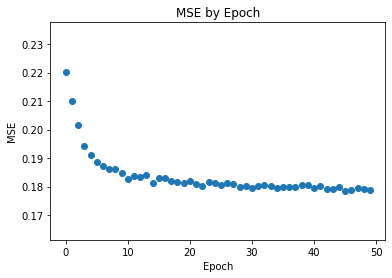

In [30]:
# Model evaluation
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')

## Exercise

Classify the following data ([source](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope)). You'll need to translate the classes into integers and make dummies. Design a neural network to classify the data and evaluate the results.

In [ ]:
names = "fLength fWidth fSize fConc fConc1 fAsym fM3Long fM3Trans fAlpha fDist class".split()
df = pd.read_csv("magic04.data", names=names)
df.head()

In [ ]:
# Create a dictionary to change the class to an int


In [ ]:
# Move create your X, y and y_cat datasets


In [ ]:
# What's their shape?


In [ ]:
# Define a model? Why not!
model = Sequential()

# How many input dimensions does X have?
# What are our output dimensions?
# Build our first layer

# Choose a value for the hidden layer

# Create the Output layer - how many output dimensions should you have?



In [ ]:
# Uses Mean Squared Error and Stochastic Gradient Descent


In [ ]:
# Train the model


In [ ]:
# Model evaluation - maybe accuracy and confusion matrix?

# Plot the error over time



## Extra Practice 

What are better loss functions for classification problems? Can you make any of the above in this notebook better by looking at binary_crossentropy? What about optimizing with Adam or others? 